In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

In [5]:
dataset_settings = read_csv(DATASET_SETTINGS_CSV, header=0, index_col=0)
dataset_settings

classes      network_model            stain  \
dataset_id                                                                  
20                                NaN       Inception-BN            nissl   
21                                NaN       Inception-BN            nissl   
22                                NaN       Inception-BN            nissl   
23          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
24          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
25          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
26                                NaN  inception-bn-blue            nissl   
27                                NaN  inception-bn-blue            nissl   
28                                NaN  inception-bn-blue            nissl   
29                                neg  inception-bn-blue            nissl   
30          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
31          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
32          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
33          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
34          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
35          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
36          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
37          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
38          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
39          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
40          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
41          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
50                                NaN  inception-bn-blue  neurotrace_blue   
51                                NaN  inception-bn-blue  neurotrace_blue   
60                                NaN                NaN            nissl   
61                                NaN                NaN            nissl   
62                                NaN                NaN            nissl   
63          pos/surPos/surNoclass/neg                NaN            nissl   
64          pos/surPos/surNoclass/neg                NaN            nissl   
65          pos/surPos/surNoclass/neg                NaN            nissl   
66          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
67          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
68          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
70          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
71          pos/surPos/surNoclass/neg  inception-bn-blue  neurotrace_blue   
72          pos/surPos/surNoclass/neg                NaN            nissl   
73          pos/surPos/surNoclass/neg                NaN            nissl   
74          pos/surPos/surNoclass/neg                NaN            nissl   
75          pos/surPos/surNoclass/neg                NaN            nissl   
76          pos/surPos/surNoclass/neg                NaN            nissl   
77          pos/surPos/surNoclass/neg                NaN            nissl   
78          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
79          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
80          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
90                                NaN                NaN            nissl   
92                                NaN                NaN            nissl   
93                                NaN                NaN            nissl   
94                                NaN                NaN            nissl   
95                                NaN                NaN            nissl   
96                                NaN                NaN            nissl   
97                        

In [4]:
dataset_id = 30
dataset_properties = dataset_settings.loc[dataset_id]

classes = dataset_properties['classes'].split('/')
num_samples_per_label = dataset_properties['num_sample_per_class']
stacks = dataset_properties['stacks'].split('/')
network_model = dataset_properties['network_model']
stain = dataset_properties['stain']
cell_features_used = dataset_properties['cell_features_used']

if network_model is np.nan and cell_features_used is np.nan:
    print "Use raw image patches"

In [5]:
structures_to_sample = all_known_structures

negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

margins_to_sample = map(int, str(dataset_properties['margins_um']).split('/'))
surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                             for m in margins_to_sample
                             for s in structures_to_sample 
                             for surr_l in all_known_structures
                             if surr_l != s]
surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                             for m in margins_to_sample
                             for s in structures_to_sample]

labels_to_sample = []
if 'pos' in classes:
    labels_to_sample += structures_to_sample
if 'neg' in classes:
    labels_to_sample += negative_labels_to_sample
if 'surPos' in classes:
    labels_to_sample += surround_positive_labels_to_sample
if 'surNoclass' in classes:
    labels_to_sample += surround_noclass_labels_to_sample

# labels_to_sample = structures_to_sample + \
# surround_positive_labels_to_sample + surround_noclass_labels_to_sample
# labels_to_sample = negative_labels_to_sample

# Shortcut: 

In [5]:
# for dataset_id in [23,24,25]:
for dataset_id in [36,37,38,39,40,41]:
    
    dataset_properties = dataset_settings.loc[dataset_id]

    classes = dataset_properties['classes'].split('/')
    num_samples_per_label = dataset_properties['num_sample_per_class']
    stacks = dataset_properties['stacks'].split('/')
    network_model = dataset_properties['network_model']
    stain = dataset_properties['stain']
    cell_features_used = dataset_properties['cell_features_used']

    if network_model is np.nan and cell_features_used is np.nan:
        print "Use raw image patches"
        
    #############################################
    
    structures_to_sample = all_known_structures

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = map(int, str(dataset_properties['margins_um']).split('/'))
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    labels_to_sample = []
    if 'pos' in classes:
        labels_to_sample += structures_to_sample
    if 'neg' in classes:
        labels_to_sample += negative_labels_to_sample
    if 'surPos' in classes:
        labels_to_sample += surround_positive_labels_to_sample
    if 'surNoclass' in classes:
        labels_to_sample += surround_noclass_labels_to_sample

###################################################

    grid_indices_lookup_fps = {stack: \
        DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, by_human=True) 
                              for stack in ['MD589', 'MD585', 'MD594']}

    features, addresses = generate_dataset(num_samples_per_label=num_samples_per_label, 
                                                         stacks=stacks,
                                                         labels_to_sample=labels_to_sample,
                                                        model_name=network_model,
                                          grid_indices_lookup_fps=grid_indices_lookup_fps)

    # Save training features
    features_fp = DataManager.get_dataset_features_filepath(dataset_id=dataset_id)
    create_parent_dir_if_not_exists(features_fp)
    save_hdf_v2(features, features_fp)
    upload_to_s3(features_fp)

    # Save training addresses
    addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id)
    save_pickle(addresses, addresses_fp)
    upload_to_s3(addresses_fp)

Read grid indices lookup: 22.86 seconds
Sample addresses (stack MD585): 26.25 seconds.
Sample addresses: 49.63 seconds
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @53783
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @51225
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @51444
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @55262
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @53789
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @50809
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @50625
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @55479
Map addresses to features: 114.91 seconds
/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:1

aws s3 cp /shared/CSHL_classifiers/datasets/dataset_36/patch_features.hdf s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_36/patch_features.hdf


Child returned 0
0.94 seconds.


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_36/patch_addresses.pkl s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_36/patch_addresses.pkl


Child returned 0
0.52 seconds.
Read grid indices lookup: 24.53 seconds
Sample addresses (stack MD589): 25.15 seconds.
Sample addresses: 50.69 seconds
Map addresses to features: 82.14 seconds


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_37/patch_features.hdf s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_37/patch_features.hdf


Child returned 0
1.12 seconds.


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_37/patch_addresses.pkl s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_37/patch_addresses.pkl


Child returned 0
0.61 seconds.
Read grid indices lookup: 16.11 seconds
Sample addresses (stack MD594): 26.87 seconds.
Sample addresses: 43.79 seconds
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @31690
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @31885
Map addresses to features: 118.92 seconds


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_38/patch_features.hdf s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_38/patch_features.hdf


Child returned 0
1.02 seconds.


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_38/patch_addresses.pkl s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_38/patch_addresses.pkl


Child returned 0
0.61 seconds.
Read grid indices lookup: 18.30 seconds
Sample addresses (stack MD585): 27.11 seconds.
Sample addresses: 46.11 seconds
Patch in annotation but not in mask: MD585 139 MD585-N26-2015.08.19-15.37.53_MD585_1_0076 @53783
Patch in annotation but not in mask: MD585 139 MD585-N26-2015.08.19-15.37.53_MD585_1_0076 @53992
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @52952
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @50167
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @53782
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @54408
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @53769
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 @54633
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.

Patch in annotation but not in mask: MD585 225 MD585-N40-2015.07.16-22.14.28_MD585_2_0119 @25341
Patch in annotation but not in mask: MD585 226 MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119 @25974
Patch in annotation but not in mask: MD585 226 MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119 @25343
Patch in annotation but not in mask: MD585 247 MD585-N44-2015.07.16-22.35.02_MD585_1_0130 @23657
Patch in annotation but not in mask: MD585 247 MD585-N44-2015.07.16-22.35.02_MD585_1_0130 @23871
Patch in annotation but not in mask: MD585 330 MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171 @37247
Patch in annotation but not in mask: MD585 332 MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172 @36191
Patch in annotation but not in mask: MD585 332 MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172 @35978
Patch in annotation but not in mask: MD585 333 MD585-N58-2015.07.16-23.40.18_MD585_2_0173 @35134
Patch in annotation but not in mask: MD585 333 MD585-N58-2015.07.16-23.40.18_MD585_2_0173 @36404
Map addresses to fea

aws s3 cp /shared/CSHL_classifiers/datasets/dataset_39/patch_features.hdf s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_39/patch_features.hdf


Child returned 0
3.88 seconds.


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_39/patch_addresses.pkl s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_39/patch_addresses.pkl


Child returned 0
1.05 seconds.
Read grid indices lookup: 18.46 seconds
Sample addresses (stack MD589): 25.33 seconds.
Sample addresses: 44.93 seconds
Patch in annotation but not in mask: MD589 217 MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119 @14097
Map addresses to features: 405.32 seconds


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_40/patch_features.hdf s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_40/patch_features.hdf


Child returned 0
3.87 seconds.


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_40/patch_addresses.pkl s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_40/patch_addresses.pkl


Child returned 0
1.18 seconds.
Read grid indices lookup: 20.08 seconds
Sample addresses (stack MD594): 25.75 seconds.
Sample addresses: 46.80 seconds
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @31690
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @31885
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @31494
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @31099
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @30708
Patch in annotation but not in mask: MD594 350 MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224 @30906
Map addresses to features: 458.13 seconds


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_41/patch_features.hdf s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_41/patch_features.hdf


Child returned 0
3.94 seconds.


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_41/patch_addresses.pkl s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_41/patch_addresses.pkl


Child returned 0
1.12 seconds.


# Gather Features for fluorescent stacks

In [19]:
grid_indices_lookup_fps = {'MD635': \
    DataManager.get_annotation_to_grid_indices_lookup_filepath(stack='MD635', by_human=False,
                                                               stack_m='atlasV3', 
                                                               classifier_setting_m=37, 
                                                               classifier_setting_f=37, 
                                                               warp_setting=8)}

In [20]:
features, addresses = generate_dataset(num_samples_per_label=10, 
                 stacks=stacks,
                 labels_to_sample=labels_to_sample,
                 model_name=network_model,
                grid_indices_lookup_fps=grid_indices_lookup_fps)

Read grid indices lookup: 2.54 seconds
Sample addresses (stack MD635): 0.74 seconds.
Sample addresses: 3.32 seconds
Patch in annotation but not in mask: MD635 280 MD635-F113-2016.05.19-23.40.05_MD635_3_0339 @68682
Patch in annotation but not in mask: MD635 295 MD635-F118-2016.05.20-01.05.52_MD635_3_0354 @62659
Patch in annotation but not in mask: MD635 348 MD635-F136-2016.05.20-05.12.43_MD635_2_0407 @38545
Patch in annotation but not in mask: MD635 350 MD635-F137-2016.05.20-05.30.36_MD635_1_0409 @40054
Patch in annotation but not in mask: MD635 341 MD635-F134-2016.05.20-04.44.11_MD635_1_0400 @36531
Map addresses to features: 142.46 seconds


In [21]:
patches = extract_patches_given_locations_multiple_sections(addresses=addresses['Pn'], 
                                                            location_or_grid_index='grid_index', 
                                                            version='cropped_gray')

Setting environment for AWS compute node


Load image: 2.40 seconds.
Load image: 2.41 seconds.
Load image: 2.43 seconds.
Load image: 2.49 seconds.
Load image: 2.47 seconds.
Load image: 2.47 seconds.
Load image: 2.40 seconds.
Load image: 2.44 seconds.
Load image: 2.49 seconds.


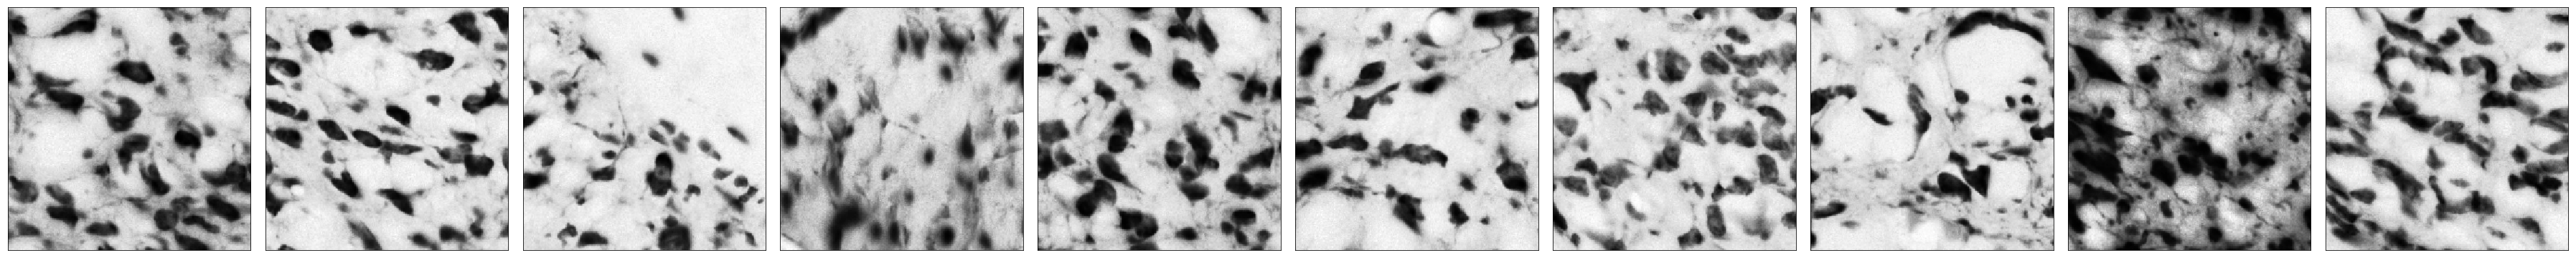

In [22]:
display_images_in_grids(patches, nc=10, cmap=plt.cm.gray)

# Gather Features for alternate stacks

In [6]:
grid_indices_lookup_fps = {'MD642': \
    DataManager.get_annotation_to_grid_indices_lookup_filepath(stack='MD642', by_human=False,
                                                               stack_m='atlasV3', 
                                                               classifier_setting_m=37, 
                                                               classifier_setting_f=37, 
                                                               warp_setting=1, 
                                                               trial_idx=4)}

In [ ]:
features, addresses = generate_dataset(num_samples_per_label=10, 
                 stacks=stacks,
                 labels_to_sample=labels_to_sample,
                 model_name=network_model,
                grid_indices_lookup_fps=grid_indices_lookup_fps)

In [9]:
patches = extract_patches_given_locations_multiple_sections(addresses=addresses['Pn'], 
                                                            location_or_grid_index='grid_index', 
                                                            version='cropped_gray')

rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N38-2017.01.19-11.27.28_MD642_2_0113_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N38-2017.01.19-11.27.28_MD642_2_0113_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N38-2017.01.19-11.27.28_MD642_2_0113_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
Child returned 0
1.97 seconds.
Load image: 2.26 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N50-2017.01.19-12.19.19_MD642_1_0148_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N50-2017.01.19-12.19.19_MD642_1_0148_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N50-2017.01.19-12.19.19_MD642_1_0148_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
1.88 seconds.
Load image: 2.18 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
1.99 seconds.
Load image: 2.28 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N40-2017.01.19-11.35.57_MD642_1_0118_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N40-2017.01.19-11.35.57_MD642_1_0118_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N40-2017.01.19-11.35.57_MD642_1_0118_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
2.00 seconds.
Load image: 2.30 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N51-2017.01.19-12.23.36_MD642_1_0151_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N51-2017.01.19-12.23.36_MD642_1_0151_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N51-2017.01.19-12.23.36_MD642_1_0151_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
2.12 seconds.
Load image: 2.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N55-2017.01.19-12.40.56_MD642_2_0164_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N55-2017.01.19-12.40.56_MD642_2_0164_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N55-2017.01.19-12.40.56_MD642_2_0164_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
2.02 seconds.
Load image: 2.32 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F42-2017.01.14-08.45.15_MD642_1_0124_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F42-2017.01.14-08.45.15_MD642_1_0124_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F42-2017.01.14-08.45.15_MD642_1_0124_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
1.92 seconds.
Load image: 2.22 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N56-2017.01.19-12.45.12_MD642_2_0167_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N56-2017.01.19-12.45.12_MD642_2_0167_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N56-2017.01.19-12.45.12_MD642_2_0167_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
1.88 seconds.
Load image: 2.17 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N53-2017.01.19-12.32.20_MD642_2_0158_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N53-2017.01.19-12.32.20_MD642_2_0158_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N53-2017.01.19-12.32.20_MD642_2_0158_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
2.04 seconds.
Load image: 2.34 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F40-2017.01.14-08.03.13_MD642_1_0118_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F40-2017.01.14-08.03.13_MD642_1_0118_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-F40-2017.01.14-08.03.13_MD642_1_0118_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
2.07 seconds.
Load image: 2.37 seconds.


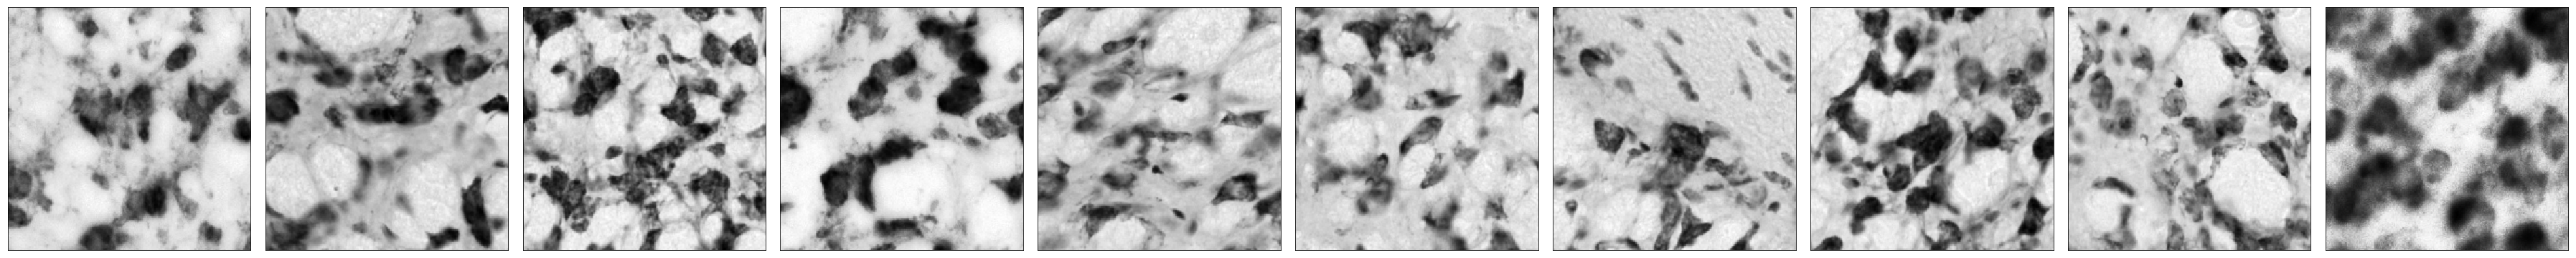

In [10]:
display_images_in_grids(patches, nc=10, cmap=plt.cm.gray)

In [56]:
patch_locations = grid_parameters_to_sample_locations(get_default_gridspec(stack='MD642'))[[gi for _,_,gi in addresses['Pn']]]

In [58]:
viz = patch_boxes_overlay_on(bg='original', 
                             downscale_factor=8, 
                            locs=patch_locations, 
                            patch_size=224,
                      stack='MD642', sec=201,
                        img_version='cropped_gray')
display_image(viz)

rm -rf /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N40-2017.01.19-11.35.57_MD642_2_0119_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N40-2017.01.19-11.35.57_MD642_2_0119_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif /shared/CSHL_data_processed/MD642/MD642_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray/MD642-N40-2017.01.19-11.35.57_MD642_2_0119_lossless_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped_gray.tif


Child returned 0
Child returned 0
1.98 seconds.


/shared/MouseBrainAtlas/learning/tmp.jpg

# Gather features for nissl stacks

In [ ]:
# for stack in ['MD589', 'MD585', 'MD594']:

#     grid_index_lookup = generate_annotation_to_grid_indices_lookup(stack=stack, by_human=True)

#     grid_indices_lookup_fp = DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, by_human=True)
#     save_hdf_v2(grid_index_lookup, grid_indices_lookup_fp)
#     upload_to_s3(grid_indices_lookup_fp)

In [41]:
grid_indices_lookup_fps = {stack: \
    DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, by_human=True) 
                          for stack in ['MD589', 'MD585', 'MD594']}

In [42]:
features, addresses = generate_dataset(num_samples_per_label=num_samples_per_label, 
                                                     stacks=stacks,
                                                     labels_to_sample=labels_to_sample,
                                                    model_name=network_model,
                                      grid_indices_lookup_fps=grid_indices_lookup_fps)

Read grid indices lookup: 17.80 seconds
Sample addresses (stack MD594): 25.39 seconds.
Sample addresses: 43.98 seconds
Map addresses to features: 78.78 seconds


In [43]:
# for label in sorted(features.iterkeys()):
#     print label, len(addresses[label])

In [44]:
# Save training features
features_fp = DataManager.get_dataset_features_filepath(dataset_id=dataset_id)
create_parent_dir_if_not_exists(features_fp)
save_hdf_v2(features, features_fp)
upload_to_s3(features_fp)

# Save training addresses
addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id)
save_pickle(addresses, addresses_fp)
upload_to_s3(addresses_fp)

aws s3 cp /shared/CSHL_classifiers/datasets/dataset_29/patch_features.hdf s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_29/patch_features.hdf


Child returned 0
1.12 seconds.


aws s3 cp /shared/CSHL_classifiers/datasets/dataset_29/patch_addresses.pkl s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_29/patch_addresses.pkl


Child returned 0
0.70 seconds.


# Gather image patches

In [ ]:
# for dataset_id in [75, 76, 77]:
    
#     dataset_properties = dataset_settings.loc[dataset_id]

#     num_samples_per_label = dataset_properties['num_sample_per_class']
#     stacks = dataset_properties['stacks'].split('/')
#     network_model = dataset_properties['network_model']
#     stain = dataset_properties['stain']
#     cell_features_used = dataset_properties['cell_features_used']

#     if network_model is np.nan and cell_features_used is np.nan:
#         print "Use raw image patches"

#     addresses = generate_dataset_addresses(num_samples_per_label=num_samples_per_label, 
#                                      stacks=stacks,
#                                      labels_to_sample=labels_to_sample)
    
#     patches = apply_function_to_dict(lambda addrs: extract_patches_given_locations_multiple_sections(addrs, 'grid_index', version='cropped_gray'), 
#                    addresses)

#     # Save training iamge patches
#     for s, ps in patches.iteritems():
#         print s
#         patch_images_fp = os.path.join(CLF_ROOTDIR, 'datasets', 'dataset_%d' % dataset_id, 'patch_images_%s.hdf' % s)
#         create_parent_dir_if_not_exists(patch_images_fp)
#         bp.pack_ndarray_file(np.asarray(ps), patch_images_fp)
#         upload_to_s3(patch_images_fp)

#     # Save training addresses
#     addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id)
#     save_pickle(addresses, addresses_fp)
#     upload_to_s3(addresses_fp)

In [9]:
for dataset_id in [75, 76, 77]:
    
    dataset_properties = dataset_settings.loc[dataset_id]

    classes = dataset_properties['classes'].split('/')
    num_samples_per_label = dataset_properties['num_sample_per_class']
    stacks = dataset_properties['stacks'].split('/')

    #############################################
    
    structures_to_sample = all_known_structures

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = map(int, str(dataset_properties['margins_um']).split('/'))
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    labels_to_sample = []
    if 'pos' in classes:
        labels_to_sample += structures_to_sample
    if 'neg' in classes:
        labels_to_sample += negative_labels_to_sample
    if 'surPos' in classes:
        labels_to_sample += surround_positive_labels_to_sample
    if 'surNoclass' in classes:
        labels_to_sample += surround_noclass_labels_to_sample

    ###################################################
        
    grid_indices_lookup_fps = {stack: DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=1,
                                                                             by_human=True)
                              for stack in stacks}    
    addresses = generate_dataset_addresses(num_samples_per_label=num_samples_per_label, 
                                         stacks=stacks,
                                         labels_to_sample=labels_to_sample,
                                          grid_indices_lookup_fps=grid_indices_lookup_fps)
    
    patches = apply_function_to_dict(lambda addrs: extract_patches_given_locations_multiple_sections(addrs, 'grid_index', version='cropped_gray'), 
                   addresses)

    variants = range(0, 1)

    addresses_vars = {}
    for s, ps in patches.iteritems():
        ps_vars = []
        addrs_vars = []
        for v in variants:
            ps_var = rotate_all_patches_variant(ps, variant=v)
            ps_vars.append(ps_var)
            addrs_vars += addresses[s]
        ps_vars = np.concatenate(ps_vars)
        
        patch_images_fp = DataManager.get_dataset_patches_filepath(dataset_id=dataset_id, structure=s)      
#         os.path.join(CLF_ROOTDIR, 'datasets', 'dataset_%d' % dataset_id, 'patch_images_%s.hdf' % s)
        create_parent_dir_if_not_exists(patch_images_fp)
        bp.pack_ndarray_file(ps_vars, patch_images_fp)
        upload_to_s3(patch_images_fp)

        # Save training addresses
        addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id, structure=s)
        save_pickle(addrs_vars, addresses_fp)
        upload_to_s3(addresses_fp)
        
    del ps_vars, addrs_vars, patches, addresses

Read: 3.29 seconds
Sample addresses (stack MD585): 23 seconds.
Sample addresses: 26.51 seconds


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.87 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.77 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.83 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.81 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.80 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.88 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.83 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.87 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.77 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.77 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.81 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.74 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.74 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.77 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.80 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.74 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.74 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.81 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.80 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.79 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 1.84 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.50 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.43 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.35 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.30 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.37 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.46 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.36 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.41 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.41 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.34 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.39 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.43 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.37 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.36 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.46 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.36 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.45 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.34 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.45 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.29 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.36 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.37 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.42 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.39 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.37 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.43 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.63 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.49 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.45 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.39 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.52 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.51 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.50 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.35 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.31 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.52 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.35 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 3.13 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.35 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.46 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.30 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.36 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.46 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.46 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.45 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.46 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.58 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.50 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.60 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.38 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.55 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.50 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.55 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.50 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.53 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.52 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.51 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.64 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_2_0116_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_2_0116_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_2_0116_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.58 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.50 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.52 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.62 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.56 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"


Load image: 2.54 seconds.


aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"
rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC19-2015.07.16-15.39.52_MD585_3_0057_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.5

Load image: 2.64 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.50 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.64 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.41 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_3_0114_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_3_0114_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_3_0114_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.58 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.52 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.71 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.59 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.46 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.51 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.61 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.54 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.65 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.61 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.59 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.62 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.62 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 3.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.69 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.64 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.65 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.61 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.59 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.59 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.59 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.64 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.62 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.56 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.66 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.63 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.65 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.62 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.61 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.56 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.53 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.70 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_3_0144_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_3_0144_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_3_0144_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.61 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.61 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.59 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.66 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.74 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.70 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.65 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.67 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.72 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.77 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.70 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.88 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.83 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 3.47 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.80 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.79 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.74 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.73 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.67 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.66 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.68 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.71 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.86 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_1_0115_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_1_0115_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N39-2015.07.16-22.09.19_MD585_1_0115_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.70 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.71 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.66 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.61 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.66 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.74 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.71 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 3.32 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 3.41 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"

Load image: 2.68 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.69 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_lossless_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropped_gray.tif"


Load image: 2.75 seconds.


aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_Amb_surround_500_7N.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_Amb_surround_500_7N.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_Amb_surround_500_7N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_Amb_surround_500_7N.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_12N_surround_500_AP.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_12N_surround_500_AP.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_12N_surround_500_AP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_12N_surround_500_AP.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_4N_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_4N_negative.hdf"
aws s3 cp "/shared/CSHL_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5I.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5I.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_VCA_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_VCA_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_VCA_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_VCA_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_Sp5C.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_Sp5C.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5C.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5C.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_12N

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_PBG_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_PBG_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_Sp5O_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_Sp5O_negative.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5O_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5O_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_SNR.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_SNR.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_SNR.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_SNR.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_Pn_surround

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_Sp5I_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_Sp5I_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5I_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_Sp5I_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_IC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_IC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_IC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_IC.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_AP_surround_500_12N.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_AP_surround_500_12N.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_RtTg.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_RtTg.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_RtTg.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_RtTg.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_10N_surround_500_AP.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_10N_surround_500_AP.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_10N_surround_500_AP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_10N_surround_500_AP.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_Tz.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_Tz.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_Tz.pkl" "s3://mousebrainatlas-

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_VLL_surround_500_SNR.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_VLL_surround_500_SNR.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_Tz_surround_500_RtTg.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_Tz_surround_500_RtTg.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_Tz_surround_500_RtTg.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_Tz_surround_500_RtTg.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_images_VCP.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_images_VCP.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patch_addresses_VCP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_75/patch_addresses_VCP.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_75/patc

Read: 14.79 seconds
Sample addresses (stack MD589): 23 seconds.
Sample addresses: 38.28 seconds


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N44-2015.07.30-19.00.35_MD589_2_0131_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_3_0180_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC69-2015.07.31-02.07.15_MD589_2_0206_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_1_0085_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC41-2015.07.31-00.06.24_MD589_1_0121_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_2_0173_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_2_0200_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_3_0078_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.41 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N38-2015.07.30-18.36.50_MD589_1_0112_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_2_0167_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_1_0193_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_3_0072_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC34-2015.07.30-23.38.35_MD589_2_0101_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_1_0160_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_1_0187_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC50-2015.07.31-00.43.12_MD589_1_0148_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_3_0054_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_1_0154_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N47-2015.07.30-19.12.19_MD589_1_0139_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_3_0090_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC43-2015.07.31-00.14.56_MD589_2_0128_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_1_0178_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_1_0205_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_2_0083_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N40-2015.07.30-18.44.48_MD589_2_0119_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.89 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_3_0198_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_2_0077_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC37-2015.07.30-23.50.39_MD589_1_0109_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_3_0165_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_3_0192_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_1_0070_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_2_0059_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.39 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_3_0159_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_2_0185_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N49-2015.07.30-19.20.15_MD589_2_0146_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_2_0053_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N33-2015.07.30-18.16.40_MD589_1_0097_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC46-2015.07.31-00.27.07_MD589_1_0136_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_1_0088_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N43-2015.07.30-18.56.33_MD589_1_0127_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.91 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_3_0177_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_2_0203_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_1_0082_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.37 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC39-2015.07.30-23.58.27_MD589_2_0116_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_2_0170_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_2_0197_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_3_0075_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N36-2015.07.30-18.28.52_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_1_0064_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_2_0164_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.88 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_1_0190_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_3_0069_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_1_0058_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_1_0157_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC48-2015.07.31-00.35.14_MD589_2_0143_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_3_0051_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC32-2015.07.30-23.30.34_MD589_1_0094_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N45-2015.07.30-19.04.31_MD589_2_0134_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_3_0087_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC42-2015.07.31-00.10.45_MD589_1_0124_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_1_0175_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_1_0202_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_2_0080_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N39-2015.07.30-18.40.43_MD589_1_0115_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_1_0169_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_3_0195_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_2_0074_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC35-2015.07.30-23.42.32_MD589_2_0104_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N21-2015.07.30-17.23.23_MD589_3_0063_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_3_0162_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_3_0189_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_1_0067_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_2_0056_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_3_0156_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_2_0182_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N48-2015.07.30-19.16.21_MD589_1_0142_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_2_0050_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N31-2015.07.30-18.08.35_MD589_2_0092_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC44-2015.07.31-00.18.50_MD589_2_0131_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_3_0180_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_3_0207_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_1_0085_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N41-2015.07.30-18.48.44_MD589_2_0122_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N58-2015.07.30-20.03.53_MD589_2_0173_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_2_0200_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_1_0079_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC38-2015.07.30-23.54.24_MD589_1_0112_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_2_0167_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.90 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_2_0194_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_3_0072_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.92 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N35-2015.07.30-18.24.53_MD589_1_0103_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_1_0061_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.92 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_2_0161_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.92 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_1_0187_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_3_0066_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_1_0055_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_1_0154_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N34-2015.07.30-18.20.43_MD589_1_0100_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC47-2015.07.31-00.31.08_MD589_1_0139_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_3_0090_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N44-2015.07.30-19.00.35_MD589_1_0130_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.79 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_2_0179_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.89 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC69-2015.07.31-02.07.15_MD589_1_0205_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_3_0084_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC40-2015.07.31-00.02.21_MD589_2_0119_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.90 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_1_0172_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_1_0199_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_2_0077_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N37-2015.07.30-18.32.51_MD589_2_0110_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_1_0166_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_3_0192_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_2_0071_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.89 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_3_0060_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_3_0159_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N62-2015.07.30-20.20.08_MD589_2_0185_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC49-2015.07.31-00.39.15_MD589_2_0146_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_2_0053_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_3_0153_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 4.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC33-2015.07.30-23.34.35_MD589_1_0097_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N46-2015.07.30-19.08.29_MD589_2_0137_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC43-2015.07.31-00.14.56_MD589_1_0127_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_3_0177_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_3_0204_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_1_0082_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N40-2015.07.30-18.44.48_MD589_1_0118_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.89 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_3_0171_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_2_0197_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_1_0076_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.16 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_2_0065_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_2_0164_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.89 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_2_0191_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_3_0069_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_1_0058_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_2_0158_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_1_0184_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N49-2015.07.30-19.20.15_MD589_1_0145_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_1_0052_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_1_0151_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N32-2015.07.30-18.12.36_MD589_2_0095_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC45-2015.07.31-00.23.02_MD589_2_0134_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.15 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_3_0087_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N42-2015.07.30-18.52.37_MD589_2_0125_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_2_0176_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_1_0202_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_3_0081_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC39-2015.07.30-23.58.27_MD589_1_0115_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_1_0169_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_1_0196_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_2_0074_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N36-2015.07.30-18.28.52_MD589_1_0106_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.92 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_3_0063_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_1_0163_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_3_0189_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_2_0068_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_3_0057_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_3_0156_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_3_0183_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.00 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC48-2015.07.31-00.35.14_MD589_1_0142_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_2_0050_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N50-2015.07.30-19.24.13_MD589_2_0149_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC31-2015.07.30-23.26.22_MD589_2_0092_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N45-2015.07.30-19.04.31_MD589_1_0133_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.92 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_1_0181_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.03 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N29-2015.07.30-17.58.29_MD589_2_0086_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC58-2015.07.31-01.22.39_MD589_3_0174_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N67-2015.07.30-20.39.13_MD589_3_0201_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_1_0079_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N38-2015.07.30-18.36.50_MD589_2_0113_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N56-2015.07.30-19.54.42_MD589_3_0168_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC65-2015.07.31-01.51.22_MD589_2_0194_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_1_0073_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC35-2015.07.30-23.42.32_MD589_1_0103_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N21-2015.07.30-17.23.23_MD589_2_0062_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC54-2015.07.31-01.03.25_MD589_2_0161_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.14 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N63-2015.07.30-20.23.12_MD589_2_0188_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_3_0066_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_1_0055_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N52-2015.07.30-19.33.44_MD589_2_0155_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC34-2015.07.30-23.38.35_MD589_1_0100_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N47-2015.07.30-19.12.19_MD589_2_0140_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_1_0049_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N31-2015.07.30-18.08.35_MD589_1_0091_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC44-2015.07.31-00.18.50_MD589_1_0130_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.95 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC60-2015.07.31-01.31.11_MD589_2_0179_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N69-2015.07.30-20.46.59_MD589_2_0206_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC28-2015.07.30-23.11.15_MD589_3_0084_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N41-2015.07.30-18.48.44_MD589_1_0121_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N58-2015.07.30-20.03.53_MD589_1_0172_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_1_0199_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N26-2015.07.30-17.44.37_MD589_3_0078_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC37-2015.07.30-23.50.39_MD589_2_0110_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_1_0166_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.18 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_1_0193_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC24-2015.07.30-22.52.55_MD589_2_0071_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N34-2015.07.30-18.20.43_MD589_2_0101_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC20-2015.07.30-22.36.03_MD589_3_0060_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_1_0160_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC62-2015.07.31-01.39.26_MD589_3_0186_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N50-2015.07.30-19.24.13_MD589_1_0148_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N18-2015.07.30-17.11.24_MD589_3_0054_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC51-2015.07.31-00.47.11_MD589_3_0153_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N33-2015.07.30-18.16.40_MD589_2_0098_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC46-2015.07.31-00.27.07_MD589_2_0137_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC30-2015.07.30-23.20.46_MD589_2_0089_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N43-2015.07.30-18.56.33_MD589_2_0128_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N60-2015.07.30-20.11.20_MD589_1_0178_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.15 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC68-2015.07.31-02.03.18_MD589_3_0204_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N28-2015.07.30-17.53.43_MD589_2_0083_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC40-2015.07.31-00.02.21_MD589_1_0118_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC57-2015.07.31-01.18.16_MD589_3_0171_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N66-2015.07.30-20.35.16_MD589_3_0198_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC26-2015.07.30-23.01.56_MD589_1_0076_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.31 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N37-2015.07.30-18.32.51_MD589_1_0109_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC22-2015.07.30-22.44.25_MD589_2_0065_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N55-2015.07.30-19.49.42_MD589_3_0165_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC64-2015.07.31-01.47.28_MD589_2_0191_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N24-2015.07.30-17.35.51_MD589_1_0070_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N20-2015.07.30-17.19.14_MD589_2_0059_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.92 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC53-2015.07.31-00.58.06_MD589_2_0158_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N62-2015.07.30-20.20.08_MD589_1_0184_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC49-2015.07.31-00.39.15_MD589_1_0145_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC18-2015.07.30-22.27.59_MD589_1_0052_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N51-2015.07.30-19.28.17_MD589_2_0152_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC32-2015.07.30-23.30.34_MD589_2_0095_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N46-2015.07.30-19.08.29_MD589_1_0136_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N30-2015.07.30-18.03.11_MD589_1_0088_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC42-2015.07.31-00.10.45_MD589_2_0125_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.52 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC59-2015.07.31-01.26.55_MD589_2_0176_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N68-2015.07.30-20.43.04_MD589_2_0203_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC27-2015.07.30-23.06.26_MD589_3_0081_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N39-2015.07.30-18.40.43_MD589_2_0116_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N57-2015.07.30-19.59.14_MD589_2_0170_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 1.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC66-2015.07.31-01.55.14_MD589_1_0196_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N25-2015.07.30-17.40.16_MD589_3_0075_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC36-2015.07.30-23.46.36_MD589_1_0106_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N22-2015.07.30-17.27.26_MD589_1_0064_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC55-2015.07.31-01.08.44_MD589_1_0163_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N64-2015.07.30-20.27.19_MD589_1_0190_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC23-2015.07.30-22.48.41_MD589_2_0068_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC19-2015.07.30-22.32.05_MD589_3_0057_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N53-2015.07.30-19.39.11_MD589_1_0157_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_3_0183_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.18 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N48-2015.07.30-19.16.21_MD589_2_0143_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.12 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N17-2015.07.30-17.07.32_MD589_3_0051_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.43 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC50-2015.07.31-00.43.12_MD589_2_0149_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.45 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N32-2015.07.30-18.12.36_MD589_1_0094_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC45-2015.07.31-00.23.02_MD589_1_0133_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC61-2015.07.31-01.35.17_MD589_1_0181_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.41 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC29-2015.07.30-23.16.01_MD589_2_0086_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.42 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N42-2015.07.30-18.52.37_MD589_1_0124_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.19 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N59-2015.07.30-20.07.00_MD589_1_0175_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC67-2015.07.31-01.59.20_MD589_3_0201_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.61 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N27-2015.07.30-17.49.06_MD589_2_0080_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.56 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC38-2015.07.30-23.54.24_MD589_2_0113_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC56-2015.07.31-01.13.31_MD589_3_0168_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N65-2015.07.30-20.31.20_MD589_3_0195_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC25-2015.07.30-22.57.23_MD589_1_0073_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.54 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N35-2015.07.30-18.24.53_MD589_2_0104_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC21-2015.07.30-22.40.00_MD589_2_0062_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.51 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N54-2015.07.30-19.44.32_MD589_3_0162_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.59 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC63-2015.07.31-01.43.31_MD589_2_0188_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.65 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N23-2015.07.30-17.31.29_MD589_1_0067_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 2.61 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N19-2015.07.30-17.15.15_MD589_2_0056_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.57 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC52-2015.07.31-00.52.41_MD589_2_0155_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-N61-2015.07.30-20.15.47_MD589_2_0182_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC47-2015.07.31-00.31.08_MD589_2_0140_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"

Load image: 3.09 seconds.



rm -rf "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif" "/shared/CSHL_data_processed/MD589/MD589_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray/MD589-IHC17-2015.07.30-22.23.59_MD589_1_0049_lossless_alignedTo_MD589-IHC31-2015.07.30-23.26.22_MD589_1_0091_cropped_gray.tif"


Load image: 2.78 seconds.


aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_Amb_surround_500_7N.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_Amb_surround_500_7N.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_Amb_surround_500_7N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_Amb_surround_500_7N.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_12N_surround_500_AP.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_12N_surround_500_AP.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_12N_surround_500_AP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_12N_surround_500_AP.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_4N_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_4N_negative.hdf"
aws s3 cp "/shared/CSHL_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_Sp5I.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_Sp5I.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_VCA_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_VCA_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_VCA_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_VCA_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_Sp5C.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_Sp5C.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_Sp5C.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_Sp5C.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_Sp5

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_IC_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_IC_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_PBG_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_PBG_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_PBG_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_PBG_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_12N_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_12N_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_12N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_LRt.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_LRt.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_LRt.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_LRt.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_Pn_surround_500_VLL.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_Pn_surround_500_VLL.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_Pn_surround_500_VLL.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_Pn_surround_500_VLL.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_IC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_IC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_IC.pkl" "s3://mousebrainatlas-data

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_SC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_SC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_SC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_SC.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_VCP_surround_500_DC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_VCP_surround_500_DC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_VCP_surround_500_DC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_VCP_surround_500_DC.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_Amb_surround_500_LRt.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_Amb_surround_500_LRt.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_Am

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_VCP_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_VCP_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_VCP_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_VCP_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_7N_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_images_7N_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_addresses_7N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_addresses_7N_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_76/patch_images_VLL_surround_500_SNR.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_76/patch_ima

rm -rf "/shared/CSHL_labelings_v3/MD594/MD594_annotation_win1_grid_indices_lookup.hdf" && mkdir -p "/shared/CSHL_labelings_v3/MD594"
aws s3 cp "s3://mousebrainatlas-data/CSHL_labelings_v3/MD594/MD594_annotation_win1_grid_indices_lookup.hdf" "/shared/CSHL_labelings_v3/MD594/MD594_annotation_win1_grid_indices_lookup.hdf"


Read: 25.64 seconds
Sample addresses (stack MD594): 25 seconds.
Sample addresses: 50.72 seconds


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_2_0152_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_2_0152_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_2_0152_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.09 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.03 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.67 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_2_0092_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_2_0092_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_2_0092_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.54 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.96 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.96 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.72 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_3_0093_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_3_0093_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_3_0093_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.10 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.12 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.11 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.07 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.06 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.17 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.06 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.08 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.07 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.12 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.08 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_3_0231_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_3_0231_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_3_0231_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.19 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_1_0220_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_1_0220_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_1_0220_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.96 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.95 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.14 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_2_0095_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_2_0095_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_2_0095_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N25-2015.08.26-22.16.07_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N25-2015.08.26-22.16.07_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N25-2015.08.26-22.16.07_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.11 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N40-2015.08.26-23.11.10_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N40-2015.08.26-23.11.10_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N40-2015.08.26-23.11.10_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_3_0096_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_3_0096_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_3_0096_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC51-2015.08.26-18.21.11_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC51-2015.08.26-18.21.11_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC51-2015.08.26-18.21.11_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.03 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.07 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.46 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_2_0155_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_2_0155_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_2_0155_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 1.99 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N16-2015.08.26-21.44.15_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N16-2015.08.26-21.44.15_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N16-2015.08.26-21.44.15_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.06 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 1.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.45 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.45 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.43 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.43 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.42 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.62 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.15 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_3_0090_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_3_0090_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_3_0090_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.90 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_1_0115_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_1_0115_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_1_0115_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 2.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.02 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 2.92 seconds.



aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_12N_surround_500_AP.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_12N_surround_500_AP.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_12N_surround_500_AP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_12N_surround_500_AP.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_4N_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_4N_negative.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_4N_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_4N_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_SNC_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_SNC_negative.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_VCA_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_VCA_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_Sp5C.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_Sp5C.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_Sp5C.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_Sp5C.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_12N_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_12N_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_12N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_12N_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifi

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_Sp5O_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_Sp5O_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_SNR.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_SNR.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_SNR.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_SNR.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_Pn_surround_500_Tz.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_Pn_surround_500_Tz.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_Pn_surround_500_Tz.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_Pn_surround_500_Tz.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_PBG_surround_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_3N_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_3N_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_RMC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_RMC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_RMC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_RMC.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_7n_surround_500_6N.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_7n_surround_500_6N.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_7n_surround_500_6N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_7n_surround_500_6N.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_10N_surround_500_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_DC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_DC.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_VCP_surround_500_VCA.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_VCP_surround_500_VCA.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_VCP_surround_500_VCA.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_VCP_surround_500_VCA.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_AP_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_AP_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_AP_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_AP_surround_500_noclass.pkl"
aws s3 cp "/shar

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_VLL_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_VLL_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_Sp5I_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_Sp5I_negative.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_Sp5I_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_Sp5I_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_images_VCA_surround_500_DC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_images_VCA_surround_500_DC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_77/patch_addresses_VCA_surround_500_DC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_77/patch_addresses_VCA_surround_500_DC.pkl"
aws s3 cp "/shar

# Gather image patches, with rotation variations

In [6]:
def rotate_all_patches_variant(patches, variant):

    if variant == 0:
        patches_variant = patches
    elif variant == 1:
        patches_variant = [p.T[::-1] for p in patches]
    elif variant == 2:
        patches_variant = [p[::-1] for p in patches]
    elif variant == 3:
        patches_variant = [p[:, ::-1] for p in patches]
    elif variant == 4:
        patches_variant = [p[::-1, ::-1] for p in patches]
    elif variant == 5:
        patches_variant = [p.T for p in patches]
    elif variant == 6:
        patches_variant = [p.T[::-1, ::-1] for p in patches]
    elif variant == 7:
        patches_variant = [p.T[:, ::-1] for p in patches]
    return patches_variant

In [19]:
addresses['10N']

[('MD585', 183, 44032),
 ('MD585', 186, 45936),
 ('MD585', 177, 45937),
 ('MD585', 181, 45513),
 ('MD585', 179, 44667),
 ('MD585', 178, 45091),
 ('MD585', 222, 45510),
 ('MD585', 208, 49110),
 ('MD585', 207, 47202),
 ('MD585', 178, 45513),
 ('MD585', 186, 46358),
 ('MD585', 188, 44032),
 ('MD585', 212, 45298),
 ('MD585', 203, 47204),
 ('MD585', 186, 42763),
 ('MD585', 208, 45932),
 ('MD585', 186, 43397),
 ('MD585', 208, 44028),
 ('MD585', 188, 46783),
 ('MD585', 213, 44451),
 ('MD585', 204, 46357),
 ('MD585', 210, 44239),
 ('MD585', 209, 48263),
 ('MD585', 205, 46146),
 ('MD585', 206, 46779),
 ('MD585', 184, 46571),
 ('MD585', 195, 49959),
 ('MD585', 175, 45091),
 ('MD585', 205, 49111),
 ('MD585', 188, 47842),
 ('MD585', 185, 45088),
 ('MD585', 210, 46567),
 ('MD585', 217, 45297),
 ('MD585', 192, 49537),
 ('MD585', 216, 47203),
 ('MD585', 193, 49537),
 ('MD585', 187, 44877),
 ('MD585', 204, 47626),
 ('MD585', 203, 48685),
 ('MD585', 210, 45509),
 ('MD585', 194, 48478),
 ('MD585', 203, 

In [21]:
# for dataset_id in [63, 64, 65]:
for dataset_id in [78, 79, 80]:
    
    dataset_properties = dataset_settings.loc[dataset_id]

    classes = dataset_properties['classes'].split('/')
    num_samples_per_label = dataset_properties['num_sample_per_class']
    stacks = dataset_properties['stacks'].split('/')

    #############################################
    
    structures_to_sample = all_known_structures
#     structures_to_sample = ['VCA']

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = map(int, str(dataset_properties['margins_um']).split('/'))
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    labels_to_sample = []
    if 'pos' in classes:
        labels_to_sample += structures_to_sample
    if 'neg' in classes:
        labels_to_sample += negative_labels_to_sample
    if 'surPos' in classes:
        labels_to_sample += surround_positive_labels_to_sample
    if 'surNoclass' in classes:
        labels_to_sample += surround_noclass_labels_to_sample

    ###################################################
        
    grid_indices_lookup_fps = {stack: DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, 
                                                                                                 win_id=1, 
                                                                                                 by_human=True)
                              for stack in stacks}
    
    addresses = generate_dataset_addresses(num_samples_per_label=num_samples_per_label, 
                                         stacks=stacks,
                                         labels_to_sample=labels_to_sample,
                                          grid_indices_lookup_fps=grid_indices_lookup_fps)
    
    patches = apply_function_to_dict(lambda addrs: \
                 extract_patches_given_locations_multiple_sections(addrs, version='gray', 
                                                                   win_id=1, 
                                                                   location_or_grid_index='grid_index'), 
                   addresses)

    variants = range(0, 8)

    addresses_vars = {}
    for s, ps in patches.iteritems():
        ps_vars = []
        addrs_vars = []
        for v in variants:
            ps_var = rotate_all_patches_variant(ps, variant=v)
            ps_vars.append(ps_var)
            addrs_vars += addresses[s]
        ps_vars = np.concatenate(ps_vars)
        
        patch_images_fp = DataManager.get_dataset_patches_filepath(dataset_id=dataset_id, structure=s)      
#         os.path.join(CLF_ROOTDIR, 'datasets', 'dataset_%d' % dataset_id, 'patch_images_%s.hdf' % s)
        create_parent_dir_if_not_exists(patch_images_fp)
        bp.pack_ndarray_file(ps_vars, patch_images_fp)
        upload_to_s3(patch_images_fp)

        # Save training addresses
        addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id, structure=s)
        save_pickle(addrs_vars, addresses_fp)
        upload_to_s3(addresses_fp)
        
    del ps_vars, addrs_vars, patches, addresses

Cannot import mxnet.
Read: 9.86 seconds
Sample addresses (stack MD585): 24 seconds.
Sample addresses: 34.45 seconds


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep2_lossless_gray.tif"


Load image: 26.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep2_lossless_gray.tif"


Load image: 26.51 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep2_lossless_gray.tif"


Load image: 19.63 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep2_lossless_gray.tif"


Load image: 19.29 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep2_lossless_gray.tif"


Load image: 21.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep2_lossless_gray.tif"


Load image: 19.59 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep2_lossless_gray.tif"


Load image: 19.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep2_lossless_gray.tif"


Load image: 19.31 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep2_lossless_gray.tif"


Load image: 19.88 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep2_lossless_gray.tif"


Load image: 18.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep2_lossless_gray.tif"

Load image: 19.36 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep2_lossless_gray.tif"


Load image: 20.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep2_lossless_gray.tif"


Load image: 19.22 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep2_lossless_gray.tif"


Load image: 19.29 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep2_lossless_gray.tif"


Load image: 20.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep2_lossless_gray.tif"

Load image: 19.90 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep2_lossless_gray.tif"

Load image: 25.66 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep2_lossless_gray.tif"


Load image: 27.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep2_lossless_gray.tif"


Load image: 20.25 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep2_lossless_gray.tif"


Load image: 20.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep2_lossless_gray.tif"


Load image: 19.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep2_lossless_gray.tif"


Load image: 17.24 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep2_lossless_gray.tif"


Load image: 16.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep2_lossless_gray.tif"

Load image: 16.20 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep2_lossless_gray.tif"

Load image: 16.95 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep2_lossless_gray.tif"


Load image: 16.21 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep2_lossless_gray.tif"


Load image: 16.15 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep2_lossless_gray.tif"


Load image: 16.19 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep2_lossless_gray.tif"


Load image: 16.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep2_lossless_gray.tif"


Load image: 16.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep2_lossless_gray.tif"


Load image: 22.22 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep2_lossless_gray.tif"


Load image: 17.55 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep2_lossless_gray.tif"

Load image: 16.63 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep2_lossless_gray.tif"


Load image: 18.56 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep2_lossless_gray.tif"


Load image: 17.27 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep2_lossless_gray.tif"


Load image: 16.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep2_lossless_gray.tif"

Load image: 17.64 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep2_lossless_gray.tif"


Load image: 16.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep2_lossless_gray.tif"


Load image: 18.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep2_lossless_gray.tif"


Load image: 20.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep2_lossless_gray.tif"


Load image: 20.80 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep2_lossless_gray.tif"

Load image: 20.31 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep2_lossless_gray.tif"


Load image: 20.82 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep2_lossless_gray.tif"


Load image: 20.85 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep2_lossless_gray.tif"

Load image: 27.75 seconds.



rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep2_lossless_gray.tif"


Load image: 15.44 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep2_lossless_gray.tif"


Load image: 16.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep2_lossless_gray.tif"


Load image: 20.14 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep2_lossless_gray.tif"


Load image: 20.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep2_lossless_gray.tif"


Load image: 20.80 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep2_lossless_gray.tif"


Load image: 20.90 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep2_lossless_gray.tif"


Load image: 21.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep2_lossless_gray.tif"


Load image: 20.82 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep2_lossless_gray.tif"


Load image: 20.19 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep2_lossless_gray.tif"


Load image: 20.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep2_lossless_gray.tif"


Load image: 21.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep2_lossless_gray.tif"


Load image: 20.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep2_lossless_gray.tif"


Load image: 20.79 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep2_lossless_gray.tif"


Load image: 20.34 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep2_lossless_gray.tif"


Load image: 20.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep2_lossless_gray.tif"


Load image: 21.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep2_lossless_gray.tif"


Load image: 28.31 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep2_lossless_gray.tif"


Load image: 16.21 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep2_lossless_gray.tif"


Load image: 8.82 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep2_lossless_gray.tif"


Load image: 9.42 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep2_lossless_gray.tif"


Load image: 18.58 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep2_lossless_gray.tif"


Load image: 22.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC39-2015.08.19-14.10.09_MD585_1_0115_prep2_lossless_gray.tif"


Load image: 20.65 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep2_lossless_gray.tif"


Load image: 19.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep2_lossless_gray.tif"


Load image: 17.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep2_lossless_gray.tif"


Load image: 17.21 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep2_lossless_gray.tif"


Load image: 17.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep2_lossless_gray.tif"


Load image: 16.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep2_lossless_gray.tif"


Load image: 17.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep2_lossless_gray.tif"


Load image: 16.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep2_lossless_gray.tif"


Load image: 17.49 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep2_lossless_gray.tif"


Load image: 17.65 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep2_lossless_gray.tif"


Load image: 17.78 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep2_lossless_gray.tif"


Load image: 17.61 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep2_lossless_gray.tif"


Load image: 17.58 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep2_lossless_gray.tif"


Load image: 17.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep2_lossless_gray.tif"


Load image: 24.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep2_lossless_gray.tif"


Load image: 18.22 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep2_lossless_gray.tif"


Load image: 17.62 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep2_lossless_gray.tif"


Load image: 17.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep2_lossless_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep2_lossless_gray.tif" "/shared/CSHL_data_processed/MD585/MD585_prep2_lossless_gray/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep2_lossless_gray.tif"


KeyboardInterrupt: 

# Gather image patches, with rotation variations and intensity variations

In [7]:
def rotate_all_patches_variant(patches, variant):

    if variant == 0:
        patches_variant = patches
    elif variant == 1:
        patches_variant = [p.T[::-1] for p in patches]
    elif variant == 2:
        patches_variant = [p[::-1] for p in patches]
    elif variant == 3:
        patches_variant = [p[:, ::-1] for p in patches]
    elif variant == 4:
        patches_variant = [p[::-1, ::-1] for p in patches]
    elif variant == 5:
        patches_variant = [p.T for p in patches]
    elif variant == 6:
        patches_variant = [p.T[::-1, ::-1] for p in patches]
    elif variant == 7:
        patches_variant = [p.T[:, ::-1] for p in patches]
    return patches_variant

In [31]:
# im = DataManager.load_image_v2(stack='MD589', prep_id=2, section=230)[7000:8000, 5000:6000, 2]

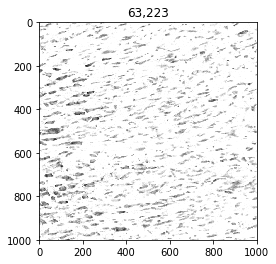

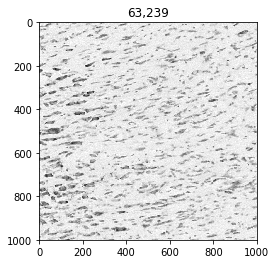

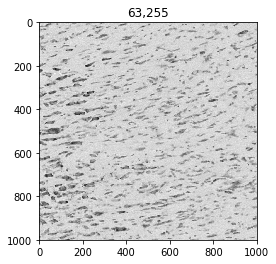

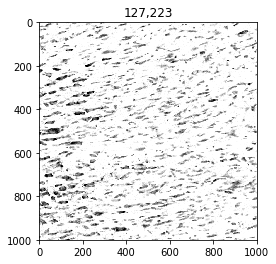

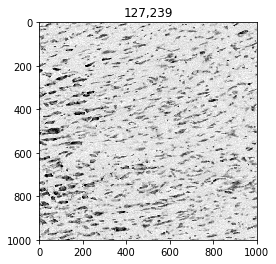

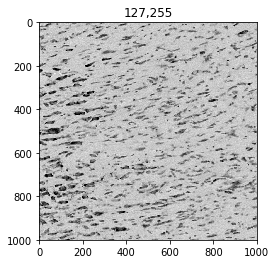

In [64]:
# intensity_variants = []
# for low in np.arange(63, 192, 64):
#     for high in [223, 239, 255]:
#         if high > low + 64:
#             intensity_variants.append((low, high))
#             plt.figure();
#             plt.imshow(rescale_intensity_v2(im, low, high), cmap=plt.cm.gray)
#             plt.title("%d,%d" % (low, high))
#             plt.show()

In [65]:
intensity_variants = [(63, 223), (63, 239), (63, 255), (127, 223), (127, 239), (127, 255)]

In [70]:
for dataset_id in [72, 73, 74]:
    
    dataset_properties = dataset_settings.loc[dataset_id]

    classes = dataset_properties['classes'].split('/')
    num_samples_per_label = dataset_properties['num_sample_per_class']
    stacks = dataset_properties['stacks'].split('/')

    #############################################
    
    structures_to_sample = all_known_structures
#     structures_to_sample = ['VCA']

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = map(int, str(dataset_properties['margins_um']).split('/'))
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    labels_to_sample = []
    if 'pos' in classes:
        labels_to_sample += structures_to_sample
    if 'neg' in classes:
        labels_to_sample += negative_labels_to_sample
    if 'surPos' in classes:
        labels_to_sample += surround_positive_labels_to_sample
    if 'surNoclass' in classes:
        labels_to_sample += surround_noclass_labels_to_sample

    ###################################################
        
    grid_indices_lookup_fps = {stack: DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=1, by_human=True)
                              for stack in stacks}
    
    addresses = generate_dataset_addresses(num_samples_per_label=num_samples_per_label, 
                                         stacks=stacks,
                                         labels_to_sample=labels_to_sample,
                                          grid_indices_lookup_fps=grid_indices_lookup_fps)
    
    patches = apply_function_to_dict(lambda addrs: \
                                     extract_patches_given_locations_multiple_sections(addrs, 'grid_index', version='cropped_gray'), 
                   addresses)

    variants = range(0, 8)

    addresses_vars = {}
    for s, ps in patches.iteritems():
        ps_vars = []
        addrs_vars = []
        for low, high in intensity_variants:
            ps = rescale_intensity_v2(np.asarray(ps), low, high)
            for v in variants:
                ps_var = rotate_all_patches_variant(ps, variant=v)
                ps_vars.append(ps_var)
                addrs_vars += addresses[s]
        ps_vars = np.concatenate(ps_vars)
        
        patch_images_fp = DataManager.get_dataset_patches_filepath(dataset_id=dataset_id, structure=s)      
#         os.path.join(CLF_ROOTDIR, 'datasets', 'dataset_%d' % dataset_id, 'patch_images_%s.hdf' % s)
        create_parent_dir_if_not_exists(patch_images_fp)
        bp.pack_ndarray_file(ps_vars, patch_images_fp)
        upload_to_s3(patch_images_fp)

        # Save training addresses
        addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id, structure=s)
        save_pickle(addrs_vars, addresses_fp)
        upload_to_s3(addresses_fp)
        
    del ps_vars, addrs_vars, patches, addresses

rm -rf "/shared/CSHL_labelings_v3/MD594/MD594_annotation_win1_grid_indices_lookup.hdf" && mkdir -p "/shared/CSHL_labelings_v3/MD594"
aws s3 cp "s3://mousebrainatlas-data/CSHL_labelings_v3/MD594/MD594_annotation_win1_grid_indices_lookup.hdf" "/shared/CSHL_labelings_v3/MD594/MD594_annotation_win1_grid_indices_lookup.hdf"

Read: 10.82 seconds
Sample addresses (stack MD594): 23 seconds.
Sample addresses: 34.48 seconds



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.72 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_2_0152_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_2_0152_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_2_0152_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.27 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.12 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.12 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.77 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.16 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.13 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.85 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.83 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.73 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.17 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.26 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.94 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_2_0092_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_2_0092_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_2_0092_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_2_0230_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_1_0070_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.06 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_2_0119_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.71 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N38-2015.08.26-23.03.12_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.67 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.76 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.90 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.67 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_2_0113_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_3_0216_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.80 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.85 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_1_0196_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N51-2015.08.26-23.54.38_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.78 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.83 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.40 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_3_0093_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_3_0093_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_3_0093_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.78 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.69 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.15 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_2_0062_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC63-2015.08.26-19.08.03_MD594_1_0187_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.19 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.14 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.98 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.60 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC53-2015.08.26-18.29.03_MD594_1_0157_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 7.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N34-2015.08.26-22.47.56_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.38 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.22 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.78 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N48-2015.08.26-23.42.33_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_2_0101_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.15 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_2_0134_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N31-2015.08.26-22.36.37_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.80 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.69 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_2_0080_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.79 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N21-2015.08.26-22.02.28_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.39 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_2_0218_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.14 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N58-2015.08.27-00.19.01_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.15 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N39-2015.08.26-23.07.15_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_3_0051_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.96 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.50 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC59-2015.08.26-18.52.40_MD594_1_0175_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.74 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.67 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_2_0143_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.80 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N45-2015.08.26-23.30.45_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_1_0073_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.12 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.23 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_2_0122_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N27-2015.08.26-22.22.46_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.34 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_3_0225_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.01 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_2_0167_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.26 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.93 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_2_0116_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.20 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.99 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_3_0210_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_1_0205_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.87 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.87 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.84 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC69-2015.08.26-19.32.32_MD594_2_0206_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_1_0154_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.11 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.77 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC28-2015.08.26-16.53.26_MD594_2_0083_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_3_0231_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_3_0231_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N77-2015.08.27-01.39.57_MD594_3_0231_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.86 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.78 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N24-2015.08.26-22.12.42_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.67 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_1_0190_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N41-2015.08.26-23.15.05_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.68 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.48 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.58 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.86 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC54-2015.08.26-18.33.01_MD594_1_0160_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.07 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_3_0201_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.79 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC35-2015.08.26-17.18.27_MD594_2_0104_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N66-2015.08.27-00.51.38_MD594_2_0197_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.31 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.16 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC66-2015.08.26-19.18.59_MD594_3_0198_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.29 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_1_0094_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.91 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.53 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.92 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC24-2015.08.26-16.39.39_MD594_2_0071_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N22-2015.08.26-22.05.55_MD594_1_0064_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.13 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_1_0220_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_1_0220_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_1_0220_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.02 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N63-2015.08.27-00.39.46_MD594_2_0188_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.14 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.30 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC22-2015.08.26-16.32.52_MD594_2_0065_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC60-2015.08.26-18.56.37_MD594_1_0178_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.82 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N53-2015.08.26-23.58.45_MD594_2_0158_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.67 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_1_0097_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.72 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.30 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"


Load image: 4.05 seconds.


aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"
rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2

Load image: 3.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC49-2015.08.26-18.13.29_MD594_2_0146_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.87 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N35-2015.08.26-22.51.43_MD594_1_0103_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.19 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC64-2015.08.26-19.11.52_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.24 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.64 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_2_0047_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_1_0226_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.32 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N46-2015.08.26-23.34.38_MD594_1_0136_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.89 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.09 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC46-2015.08.26-18.02.16_MD594_2_0137_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.79 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N28-2015.08.26-22.26.13_MD594_1_0082_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_1_0058_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.23 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N73-2015.08.27-01.23.07_MD594_3_0219_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.77 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_2_0170_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.14 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.28 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC36-2015.08.26-17.22.13_MD594_2_0107_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.34 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N18-2015.08.26-21.52.46_MD594_1_0052_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC71-2015.08.26-19.41.10_MD594_2_0212_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.13 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N59-2015.08.27-00.23.42_MD594_2_0176_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_2_0164_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.15 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_2_0095_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_2_0095_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N32-2015.08.26-22.40.16_MD594_2_0095_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.97 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC18-2015.08.26-16.19.43_MD594_2_0053_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_1_0208_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N49-2015.08.26-23.46.35_MD594_1_0145_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.72 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 6.76 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC29-2015.08.26-16.56.59_MD594_2_0086_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.64 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC44-2015.08.26-17.54.29_MD594_1_0130_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.19 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N25-2015.08.26-22.16.07_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N25-2015.08.26-22.16.07_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N25-2015.08.26-22.16.07_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC61-2015.08.26-19.00.29_MD594_1_0181_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N42-2015.08.26-23.18.56_MD594_1_0124_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC26-2015.08.26-16.46.33_MD594_1_0076_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.37 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC75-2015.08.26-19.58.13_MD594_1_0223_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.96 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N57-2015.08.27-00.14.56_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.07 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC42-2015.08.26-17.46.49_MD594_2_0125_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.12 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N40-2015.08.26-23.11.10_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N40-2015.08.26-23.11.10_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N40-2015.08.26-23.11.10_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC16-2015.08.26-16.11.01_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.87 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_1_0211_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_2_0203_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.73 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N55-2015.08.27-00.06.50_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_3_0096_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_3_0096_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC32-2015.08.26-17.07.31_MD594_3_0096_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.97 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N69-2015.08.27-01.05.43_MD594_3_0207_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.04 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC51-2015.08.26-18.21.11_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC51-2015.08.26-18.21.11_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC51-2015.08.26-18.21.11_MD594_1_0151_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.16 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.87 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC67-2015.08.26-19.23.30_MD594_2_0200_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.88 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N29-2015.08.26-22.29.38_MD594_1_0085_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.78 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC77-2015.08.26-20.06.30_MD594_1_0229_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.81 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC25-2015.08.26-16.43.04_MD594_2_0074_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N64-2015.08.27-00.43.47_MD594_2_0191_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC40-2015.08.26-17.38.31_MD594_1_0118_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.62 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.83 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC23-2015.08.26-16.36.13_MD594_2_0068_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.17 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.07 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC57-2015.08.26-18.45.01_MD594_1_0169_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N54-2015.08.27-00.02.48_MD594_2_0161_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.73 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC38-2015.08.26-17.30.18_MD594_1_0112_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.81 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.76 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_2_0215_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.06 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC55-2015.08.26-18.37.04_MD594_1_0163_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.88 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N36-2015.08.26-22.55.28_MD594_1_0106_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.32 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_2_0194_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.37 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.69 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC76-2015.08.26-20.02.20_MD594_3_0228_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.12 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N67-2015.08.27-00.56.36_MD594_1_0199_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.13 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC31-2015.08.26-17.04.03_MD594_1_0091_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N62-2015.08.27-00.35.50_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.78 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC47-2015.08.26-18.06.03_MD594_2_0140_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.78 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC21-2015.08.26-16.29.30_MD594_1_0061_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N74-2015.08.27-01.27.25_MD594_2_0221_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.07 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_2_0185_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.81 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.84 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC37-2015.08.26-17.26.13_MD594_2_0110_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N23-2015.08.26-22.09.28_MD594_1_0067_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.05 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC74-2015.08.26-19.54.07_MD594_3_0222_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.98 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N60-2015.08.27-00.27.50_MD594_2_0179_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.00 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_2_0155_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_2_0155_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC52-2015.08.26-18.25.10_MD594_2_0155_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.18 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N33-2015.08.26-22.44.00_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC19-2015.08.26-16.22.51_MD594_2_0056_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.11 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N72-2015.08.27-01.18.48_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.17 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC68-2015.08.26-19.27.59_MD594_1_0202_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.23 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N50-2015.08.26-23.50.36_MD594_1_0148_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.38 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC34-2015.08.26-17.14.47_MD594_1_0100_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.78 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N65-2015.08.27-00.47.47_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.26 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC50-2015.08.26-18.17.23_MD594_2_0149_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.01 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N16-2015.08.26-21.44.15_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N16-2015.08.26-21.44.15_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N16-2015.08.26-21.44.15_MD594_3_0048_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.31 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N76-2015.08.27-01.35.41_MD594_2_0227_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.23 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC45-2015.08.26-17.58.25_MD594_1_0133_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.18 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_2_0089_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.85 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC62-2015.08.26-19.04.18_MD594_1_0184_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.19 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N47-2015.08.26-23.38.33_MD594_1_0139_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.13 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC27-2015.08.26-16.50.00_MD594_1_0079_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.23 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N20-2015.08.26-21.59.11_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.92 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC73-2015.08.26-19.49.55_MD594_1_0217_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.03 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC43-2015.08.26-17.50.40_MD594_2_0128_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.39 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N37-2015.08.26-22.59.18_MD594_1_0109_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC17-2015.08.26-16.15.19_MD594_2_0050_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N71-2015.08.27-01.14.30_MD594_3_0213_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.93 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_2_0173_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.17 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N56-2015.08.27-00.10.53_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.07 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC33-2015.08.26-17.11.04_MD594_2_0098_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.10 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N19-2015.08.26-21.55.55_MD594_1_0055_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.95 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC72-2015.08.26-19.45.24_MD594_1_0214_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.15 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N70-2015.08.27-01.10.06_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.09 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC48-2015.08.26-18.09.45_MD594_1_0142_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.09 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC65-2015.08.26-19.15.27_MD594_1_0193_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.03 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N30-2015.08.26-22.33.07_MD594_1_0088_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.75 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N44-2015.08.26-23.26.52_MD594_2_0131_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.00 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_3_0090_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_3_0090_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC30-2015.08.26-17.00.29_MD594_3_0090_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.04 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N61-2015.08.27-00.31.50_MD594_2_0182_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.20 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC41-2015.08.26-17.42.44_MD594_1_0121_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.08 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N26-2015.08.26-22.19.23_MD594_2_0077_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 5.31 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC20-2015.08.26-16.26.10_MD594_2_0059_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 5.11 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N75-2015.08.27-01.31.30_MD594_2_0224_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.43 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.88 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N43-2015.08.26-23.22.56_MD594_1_0127_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.05 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_1_0115_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_1_0115_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC39-2015.08.26-17.34.24_MD594_1_0115_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.94 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N17-2015.08.26-21.48.26_MD594_1_0049_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 4.13 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC70-2015.08.26-19.36.50_MD594_2_0209_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"


Load image: 3.82 seconds.


rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-N68-2015.08.27-01.01.13_MD594_3_0204_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 3.85 seconds.



rm -rf "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" && mkdir -p "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif" "/shared/CSHL_data_processed/MD594/MD594_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray/MD594-IHC56-2015.08.26-18.40.59_MD594_1_0166_lossless_alignedTo_MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172_cropped_gray.tif"

Load image: 4.10 seconds.



aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_12N_surround_500_AP.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_12N_surround_500_AP.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N_surround_500_AP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N_surround_500_AP.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_4N_negative.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_4N_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_4N_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_negative.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_VCA_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_VCA_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5C.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5C.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_12N_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_12N_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifi

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5O_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5O_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNR.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNR.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_SNR.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_SNR.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_Tz.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_Tz.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Pn_surround_500_Tz.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Pn_surround_500_Tz.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_PBG_surround_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_3N_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_3N_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RMC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_RMC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_RMC.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_6N.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_6N.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_7n_surround_500_6N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_7n_surround_500_6N.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_10N_surround_500_

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_DC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_DC.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_VCA.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_VCA.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_VCP_surround_500_VCA.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_VCP_surround_500_VCA.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_noclass.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_noclass.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP_surround_500_noclass.pkl"
aws s3 cp "/shar

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_VLL_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_VLL_surround_500_noclass.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5I_negative.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5I_negative.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5I_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5I_negative.pkl"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_DC.hdf" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_DC.hdf"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_VCA_surround_500_DC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_VCA_surround_500_DC.pkl"
aws s3 cp "/shar

# Convert patches to features

In [5]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=8, batch_size=batch_size)

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:52: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:64: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [6]:
for feature_dataset_id in [75, 76, 77]:
    
    dataset_properties = dataset_settings.loc[feature_dataset_id]
    
    classes = dataset_properties['classes'].split('/')
#     num_samples_per_label = dataset_properties['num_sample_per_class']
#     stacks = dataset_properties['stacks'].split('/')
    patch_dataset_ids = map(lambda x: int(float(x)), str(dataset_properties['raw_image_dataset']).split('/'))

    #############################################
    
    structures_to_sample = all_known_structures
#     structures_to_sample = ['VCA']

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = map(int, str(dataset_properties['margins_um']).split('/'))
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    labels_to_sample = []
    if 'pos' in classes:
        labels_to_sample += structures_to_sample
    if 'neg' in classes:
        labels_to_sample += negative_labels_to_sample
    if 'surPos' in classes:
        labels_to_sample += surround_positive_labels_to_sample
    if 'surNoclass' in classes:
        labels_to_sample += surround_noclass_labels_to_sample
    
    ###################################################
    
    for label in labels_to_sample:
        
        training_patches, training_addresses = load_dataset_images(dataset_ids=patch_dataset_ids, 
                                                                   labels_to_sample=[label])
        if label not in training_patches:
            continue
                
        print label, len(training_patches[label])
        features = convert_image_patches_to_features(patches=training_patches[label], model=model, mean_img=mean_img, batch_size=batch_size)
        
        ##################################################

        # Save training features
        features_fp = DataManager.get_dataset_features_filepath(dataset_id=feature_dataset_id, structure=label, ext='bp')
        create_parent_dir_if_not_exists(features_fp)
        bp.pack_ndarray_file(features, features_fp)
        upload_to_s3(features_fp)

        # Save training addresses
        addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=feature_dataset_id, structure=label)
        save_pickle(training_addresses, addresses_fp)
        upload_to_s3(addresses_fp)

5N 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_5N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_5N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_5N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_5N.pkl"
6N 18672
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_6N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_6N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_6N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_6N.pkl"
7N 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_7N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_7N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_7N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/p

12N 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_12N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_12N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_12N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_12N.pkl"
RtTg 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_RtTg.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_RtTg.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_RtTg.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_RtTg.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5.hdf"
rm -r

Sp5O_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_Sp5O_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_Sp5O_negative.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_Sp5O_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_Sp5O_negative.pkl"
Sp5C_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_Sp5C_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_Sp5C_negative.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_Sp5C_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_Sp5C_negative.pkl"
PBG_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_PBG_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_PBG_negative.bp"
aws s

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_VLL.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_RMC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_RMC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_5N_surround_500_SNR.hdf" && mkdir -p "/shared/

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_Amb.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_Amb.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_Amb.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_LC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_LC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_6N_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/pat

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_VCP.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_VCP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_DC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_DC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_DC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_AP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_AP.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_AP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7N_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_c

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_Sp5O.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_Sp5O.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_Sp5O.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_7n_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/datas

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_RMC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Amb_surround_500_3N.hdf" && mkdir -p "

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_Amb.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_Amb.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_Amb.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_LRt.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/pa

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_IC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LC_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/pat

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_AP.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_AP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_LRt_surround_500_sp5.hdf" && mkdir -p

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Pn_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_4N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Tz_surround_500_Sp5I.hdf" && mkdir -p "/shared/CSHL_

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_LRt.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_Tz.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_VLL_surround_500_Tz.hdf" "/shared/CSHL_classifiers/datasets/dataset_

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_7N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_7n.hdf" && mkdir -p "/shared/

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_sp5.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_outerContour.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_RMC_surround_500_outerContour.hdf" "/shared/CSHL_cla

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_VCP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_VCP.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_VCP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNC_surround_500_DC.hdf" && mkdir -p "

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_4N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_Sp5I.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_Sp5I.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_Sp5I.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SNR_surround_500_Sp5O.hdf" && mkdir -p "

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_7N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_4N_surround_500_7n.hdf" && mkdir -p "/shared/CSHL_clas

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5I_surround_500_VCP.hdf" && 

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_LC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_LRt.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_Tz.hdf" && mkdir 

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_Sp5C_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_7N.hdf" && mkdir -p "/share

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_PBG_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_VCA_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_VCP_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_VCP_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_cl

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_DC_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_AP_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_AP_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_AP_surround_500_PBG.hdf"
AP_surround_500_10N 2496
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_AP_surround_500_10N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_AP_surround_500_10N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_AP_surround_500_10N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_AP_surround_500_10N.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_AP_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_4N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_12N_surround_500_Sp5I.hdf" && mkdir -p "/sha

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_RtTg_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_RtTg_surround_500_LRt.hdf"
RtTg_surround_500_Pn 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_RtTg_surround_500_Pn.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_RtTg_surround_500_Pn.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_RtTg_surround_500_Pn.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_RtTg_surround_500_Pn.pkl"
RtTg_surround_500_Tz 20784
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_RtTg_surround_500_Tz.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_RtTg_surround_500_Tz.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_RtTg_surround_500_Tz.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_7N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_7n.hdf" && mkdir -p "/shared/

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_outerContour.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_sp5_surround_500_outerContour.hdf" "/shared/CSHL_cla

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_outerContour_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifie

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_SC_surround_500_4N.hdf" && mkdir -p "/shared/CSHL

rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_LRt.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_Tz.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_72"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_images_IC_surround_500_Tz.hdf" "/shared/CSHL_classifiers/datasets/dataset_72/patch

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_5N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_5N_surround_500_noclass.pkl"
6N_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_6N_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_6N_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_6N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_6N_surround_500_noclass.pkl"
7N_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_7N_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_7N_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_7N_surround_500_noclass.pkl" "s3://m

10N_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_10N_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_10N_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_10N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_10N_surround_500_noclass.pkl"
VCA_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_features_VCA_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_features_VCA_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_addresses_VCA_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_72/patch_addresses_VCA_surround_500_noclass.pkl"
VCP_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_72/patch_featu

RMC 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_RMC.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_RMC.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_RMC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_RMC.pkl"
SNC 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_SNC.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_SNC.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_SNC.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_SNC.pkl"
SNR 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_SNR.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_SNR.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_SNR.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/dataset

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_7n_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_7n_negative.pkl"
Amb_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_Amb_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_Amb_negative.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_Amb_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_Amb_negative.pkl"
LC_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_LC_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_LC_negative.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_LC_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_LC_negative.pkl"
LRt_negative 48000
aws s3 cp "/shared

RtTg_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_RtTg_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_RtTg_negative.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_RtTg_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_RtTg_negative.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_negative.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_negative.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_negative.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_negative.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_negative.hdf" "/shared/CSHL

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_VCP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_VCP.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_VCP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_5N_surround_500_DC.hdf" && mkdir -p "/shared/C

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_4N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_Sp5I.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_Sp5I.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_Sp5I.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_Sp5O.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_6N_surround_500_Sp5O.hdf" "/shared/CSHL_classifiers/datasets/dataset_7

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_VLL.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_VLL.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_RMC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_RMC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7N_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_7N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_Amb.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_Amb.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_Amb.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_LC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_LC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_outerContour.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_outerContour.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_SC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_SC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_SC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_IC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_7n_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Amb_surround_500_5N.hdf" && mkdir 

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_Sp5O.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_Sp5O.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LC_surround_500_10N.hdf" && mkdir -p "/sh

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_LRt_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/datas

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_Amb.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_Amb.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_LC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_LC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_LRt.hdf"
Pn_surround_500_Tz 240
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_Pn_surround_500_Tz.bp

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_SC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_SC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_IC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Pn_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_clas

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_AP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_AP.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_AP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Tz_surround_500_12N.hdf"
Tz_surround_500_RtTg 7584
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_Tz_surround_500_RtTg.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_Tz_surround_500_RtTg.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_Tz_surround_5

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VLL_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VLL_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VLL_surround_500_Sp5C.hdf"
VLL_surround_500_PBG 3312
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_VLL_surround_500_PBG.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_VLL_surround_500_PBG.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_VLL_surround_500_PBG.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_VLL_surround_500_PBG.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VLL_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/data

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RMC_surround_500_4N.hdf" && mkdir -p "/sh

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNC_surround_500_IC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SNC_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNC_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_AP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_AP.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_AP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SNR_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/data

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_3N_surround_500_VCA.hdf" && mkdir -p "/share

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_4N_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_4N_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_4N_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_4N_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_4N_surround_500_SNR.hdf"
4N_surround_500_3N 8304
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_4N_surround_500_3N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_4N_surround_500_3N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_4N_surround_500_3N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_4N_surround_500_3N.pkl"
rm -rf "/shared/CSHL_classifiers/datas

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5I_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5I_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_7N.hdf" && mkdir -p 

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5O_surround_500_sp5.hdf" "/shared/CSHL_classifiers/d

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_Sp5C_surround_500_VCA.hdf" "/shared/CSHL_classifiers/data

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_PBG_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_PBG_surround_500_SNC.hdf"
PBG_surround_500_SNR 3552
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_PBG_surround_500_SNR.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_PBG_surround_500_SNR.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_PBG_surround_500_SNR.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_PBG_surround_500_SNR.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_PBG_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_PBG_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_PBG_surround_500_3N.hdf"
rm -rf "/shared/CSHL_class

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_10N_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_10N_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_7N.hdf" && mkdir -p "/shared/

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VCA_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCP_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VCP_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCP_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCP_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_VCP_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_VCP_surround_500_10N.hdf"
VCP_surround_500_VCA 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_VCP_surround_500_VCA.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_VCP_surround_500_VCA.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_VCP

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_4N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_DC_surround_500_Sp5I.hdf" && mkdir -p "/shared/CSHL_

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_Tz.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_Tz.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_Tz.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_VLL.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_AP_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_7N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_7n.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_7n.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_7n.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_Amb.hdf" && mkdir -p "/shared

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_sp5.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_outerContour.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_outerContour.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_outerContour.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_SC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_12N_surround_500_SC.hdf" "/shared/CSHL

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_VCP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_RtTg_surround_500_VCP.hdf" "/shared/CSHL_classifiers/data

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_4N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_Sp5I.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_Sp5I.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_Sp5I.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_sp5_surround_500_Sp5O.hdf" && mkdir -p "

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_Tz.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_Tz.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_Tz.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_VLL.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_outerContour_surround_500_VLL.hdf"
rm -rf "/shared/CSHL_classifiers/data

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_7N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_7n.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_7n.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_im

rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_sp5.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_outerContour.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_SC_surround_500_outerContour.hdf" "/shared/CSHL_classifiers

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_VCP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_73"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_VCP.hdf" "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_VCP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_73/patch_images_IC_surround_500_DC.hdf" && mkdir -p "/shared/C

SNC_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_SNC_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_SNC_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_SNC_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_SNC_surround_500_noclass.pkl"
SNR_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_features_SNR_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_features_SNR_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_SNR_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_SNR_surround_500_noclass.pkl"
3N_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_featur

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_73/patch_addresses_IC_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_73/patch_addresses_IC_surround_500_noclass.pkl"
5N 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_5N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_5N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_5N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_5N.pkl"
6N 18672
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_6N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_6N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_6N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_6N.pkl"
7N 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_7N.bp" "s3://mousebrainatlas

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP.pkl"
12N 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_12N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_12N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N.pkl"
RtTg 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_RtTg.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_RtTg.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_RtTg.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_RtTg.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
a

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5I_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5I_negative.pkl"
Sp5O_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_Sp5O_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_Sp5O_negative.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5O_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5O_negative.pkl"
Sp5C_negative 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_Sp5C_negative.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_Sp5C_negative.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5C_negative.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5C_negative.pkl"
PBG_negative 48000

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_VLL.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_VLL.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_RMC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_RMC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_5N_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_6N_surround_500_7n.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_6N_surround_500_7n.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_Amb.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_Amb.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_Amb.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_LC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_LC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_LRt.hdf" && mkdir -p "/shared

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_outerContour.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_outerContour.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_SC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_SC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_SC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_IC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_6N_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_5N.hdf" && mkdir -

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_DC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_DC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_AP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_AP.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_AP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7N_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_7n_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Amb_surround_500_4N.hdf" && mkdir -p "/sh

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_12N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_12N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_sp5.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_LRt_surround_500_outerContour.hdf" 

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_10N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_10N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_10N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_VCP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Pn_surround_500_VCP.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_3N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_4N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_4N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_4N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_Sp5I.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_Sp5I.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_Sp5I.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Tz_surround_500_Sp5O.hdf" && mkdir -p "/shared/C

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_Tz.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_Tz.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_Tz.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_RMC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VLL_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_7

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_7N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_7n.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_7n.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_7n.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_Amb.hdf" && mkdir -p "/shared

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_sp5.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_outerContour.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_outerContour.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_outerContour.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_SC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RMC_surround_500_SC.hdf" "/shared/CSHL

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_VCP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_VCP.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_VCP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_DC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_DC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_DC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNC_surround_500_AP.hdf" && mkdir -p "/sh

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5I.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5I.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5I.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5O.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5O.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5O.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SNR_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/data

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_Tz.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_Tz.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_VLL.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_VLL.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_RMC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_RMC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_3N_surround_500_SNC.hdf" && mkdir -p "/shared/CS

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_7n.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_7n.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_7n.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_Amb.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_Amb.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_Amb.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_LC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_SC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_SC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_SC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_IC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_4N_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5I_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5I_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patc

Sp5O_surround_500_Sp5I 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_Sp5O_surround_500_Sp5I.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_Sp5O_surround_500_Sp5I.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5O_surround_500_Sp5I.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Sp5O_surround_500_Sp5I.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5O_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5O_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5O_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5O_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifier

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_VLL.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_RMC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_RMC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_Sp5C_surround_500_SNR.hdf" && 

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_PBG_surround_500_SC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_PBG_surround_500_SC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_PBG_surround_500_SC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_PBG_surround_500_IC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_PBG_surround_500_IC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_PBG_surround_500_IC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_10N_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_10N_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/

10N_surround_500_AP 8208
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_10N_surround_500_AP.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_10N_surround_500_AP.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_10N_surround_500_AP.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_10N_surround_500_AP.pkl"
10N_surround_500_12N 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_10N_surround_500_12N.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_10N_surround_500_12N.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_10N_surround_500_12N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_10N_surround_500_12N.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_10N_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/data

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_Sp5O.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_Sp5O.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCA_surround_500_10N.hdf" && mkdi

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_VCP_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/datas

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_LC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_LRt.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_DC_surround_500_Tz.hdf" && mkdir -p "/shared/CSHL_c

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_7N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_im

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP_surround_500_12N.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP_surround_500_12N.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_RtTg.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_RtTg.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_RtTg.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_sp5.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_sp5.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_sp5.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_AP_surround_500_outerContour.hdf" && 

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_RtTg_surround_500_3N.hdf" "/shared/CSHL_classifiers/datase

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_LC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_LC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_LRt.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_LRt.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_LRt.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_Pn.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_Pn.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_Pn.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_sp5_surround_500_Tz.hdf" && mkdir -p "/shar

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_5N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_5N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_5N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_6N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_6N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_6N.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_7N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_outerCon

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_DC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_DC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_DC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_AP.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_AP.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_AP.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_outerContour_surround_500_12N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_outerCo

aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_Sp5O.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_Sp5O.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_Sp5C.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_Sp5C.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_Sp5C.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_PBG.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_PBG.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_PBG.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_SC_surround_500_10N.hdf" && mkdir -p "/sh

rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_SNC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_SNR.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_SNR.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_SNR.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_3N.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_74"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_images_IC_surround_500_3N.hdf" "/shared/CSHL_classifiers/datasets/dataset_74/pa

aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_Amb_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_Amb_surround_500_noclass.pkl"
LC_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_LC_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_LC_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_LC_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_LC_surround_500_noclass.pkl"
LRt_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_LRt_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_LRt_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_LRt_surround_500_noclass.pkl" "

AP_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_AP_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_AP_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_AP_surround_500_noclass.pkl"
12N_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_12N_surround_500_noclass.bp" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_features_12N_surround_500_noclass.bp"
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N_surround_500_noclass.pkl" "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_74/patch_addresses_12N_surround_500_noclass.pkl"
RtTg_surround_500_noclass 48000
aws s3 cp "/shared/CSHL_classifiers/datasets/dataset_74/patch_features_